<a href="https://colab.research.google.com/github/arobiddin/data_scince_ls_works/blob/main/k_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

# Classification
## k-NN

# Diabet kasallagiga tashxis qo’yish.

**Tavsif:**
Quyidagi ma’lumotlar to’plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o’lchovlar asosida bemorda diabet bor-yo’qligini taxmin qilishdir.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
567,6,92,62,32,126,32.0,0.085,46,0
733,2,106,56,27,165,29.0,0.426,22,0
157,1,109,56,21,135,25.2,0.833,23,0
341,1,95,74,21,73,25.9,0.673,36,0
73,4,129,86,20,270,35.1,0.231,23,0
618,9,112,82,24,0,28.2,1.282,50,1
444,4,117,62,12,0,29.7,0.380,30,1
245,9,184,85,15,0,30.0,1.213,49,1
692,2,121,70,32,95,39.1,0.886,23,0
168,4,110,66,0,0,31.9,0.471,29,0


**Ustunlar:**



*   Pregnancies: homilador bo’lish soni
*   Glucose: glyukozaga test natijasi
*   BloodPressure: diastolik qon bosimi (mm Hg)
*   SkinThickness: Triceps teri burmasining qalinligi (mm)
*   Insulin: 2 soatlik sarum insulini (mu U/ml)
*   BMI: Tana massasi indeksi (vazn kg / (m bo’yi) ^ 2)
*   DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
*   Age: Yosh (yil)
*   Outcome: Class (0 – diabet yo’q, 1 – diabet)

In [3]:
df.shape


(768, 9)

In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [15]:
df = df.drop(['DiabetesPedigreeFunction','Insulin','SkinThickness','BloodPressure'], axis=1)

In [16]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']
#X, y = df[:, :-1], df[:, -1]


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=71)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_predict = knn.predict(X_test)

In [20]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.42857142857142855

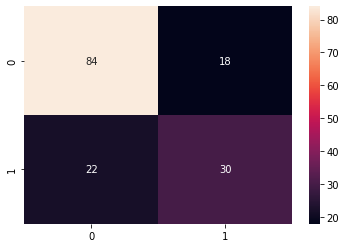

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [22]:
confusion_matrix(y_test, y_predict)

array([[84, 18],
       [22, 30]])

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"precision={precision}\nrecall={recall}\nf1={f1}\naccuracy={accuracy}")

precision=0.625
recall=0.5769230769230769
f1=0.6
accuracy=0.7402597402597403


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       102
           1       0.62      0.58      0.60        52

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.74      0.74      0.74       154



In [27]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       500
           1       0.64      0.60      0.62       268

    accuracy                           0.74       768
   macro avg       0.72      0.71      0.71       768
weighted avg       0.74      0.74      0.74       768



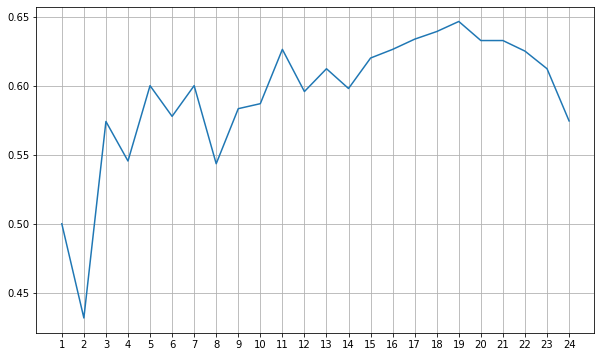

In [28]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [30]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 22, 21, 19, 17, 20, 18, 16, 15,  9,  7,  4,  2, 10,  3,  1,
        5,  8, 11, 14, 12,  6, 13], dtype=int32)

In [31]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [32]:
knn_gscv.best_score_

0.774849333672863

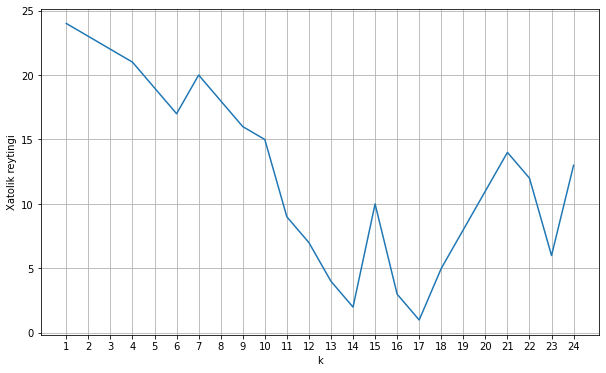

In [33]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

**Tahlil tugallanmagan...**